In [55]:
from sklearn import manifold
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import glob
%matplotlib inline

In [1]:
!mkdir figures

/home/amir/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


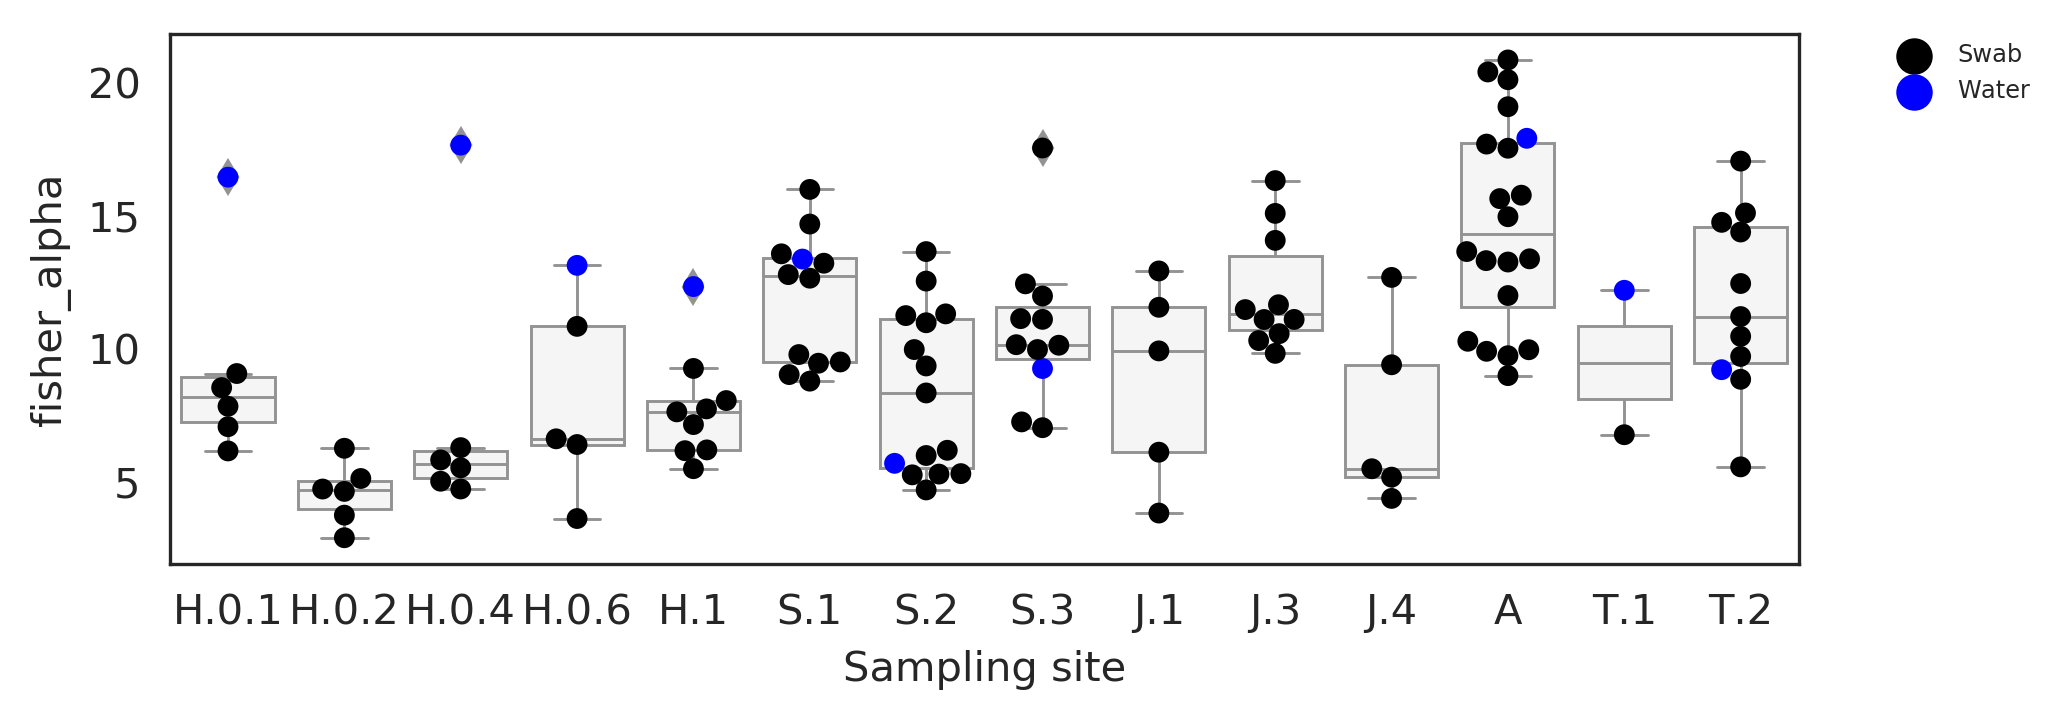

/home/amir/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


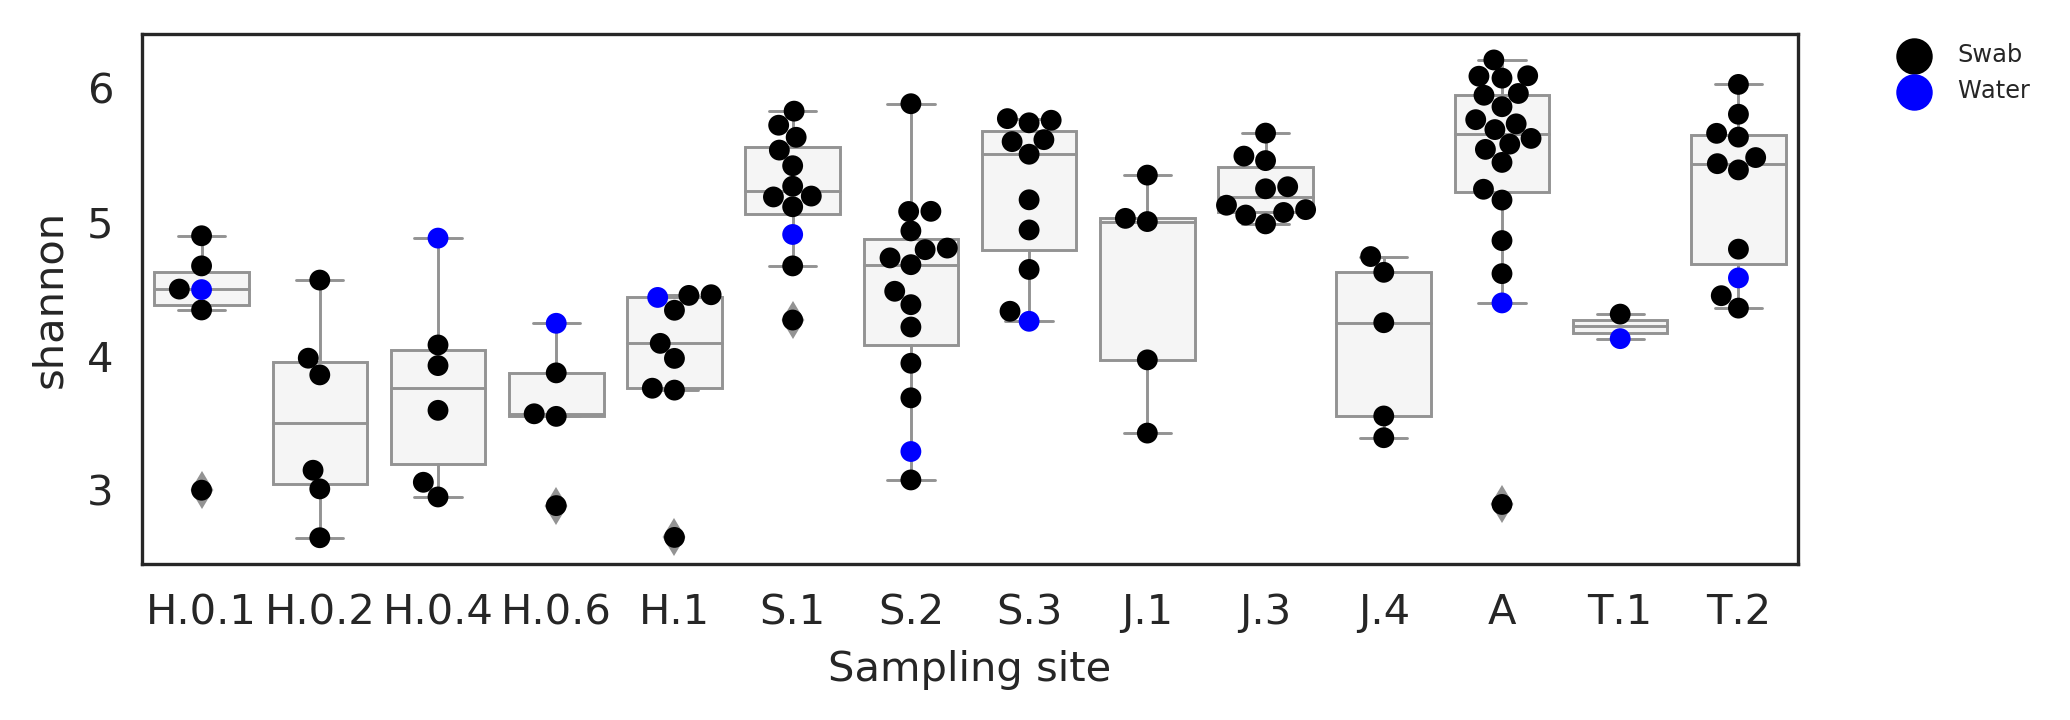

/home/amir/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


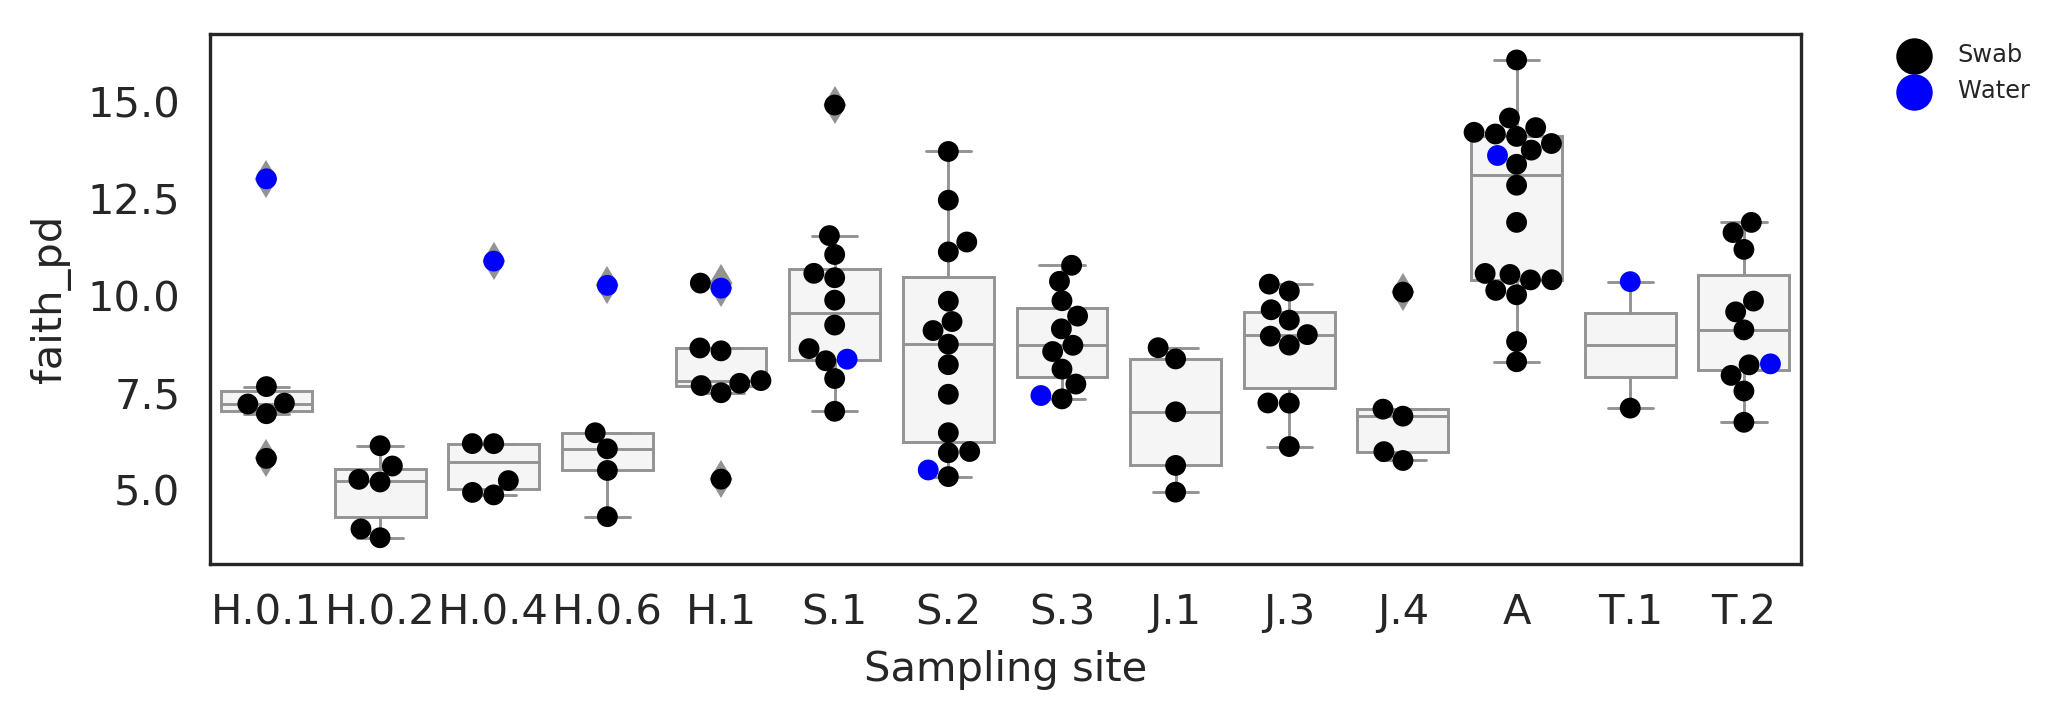

/home/amir/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


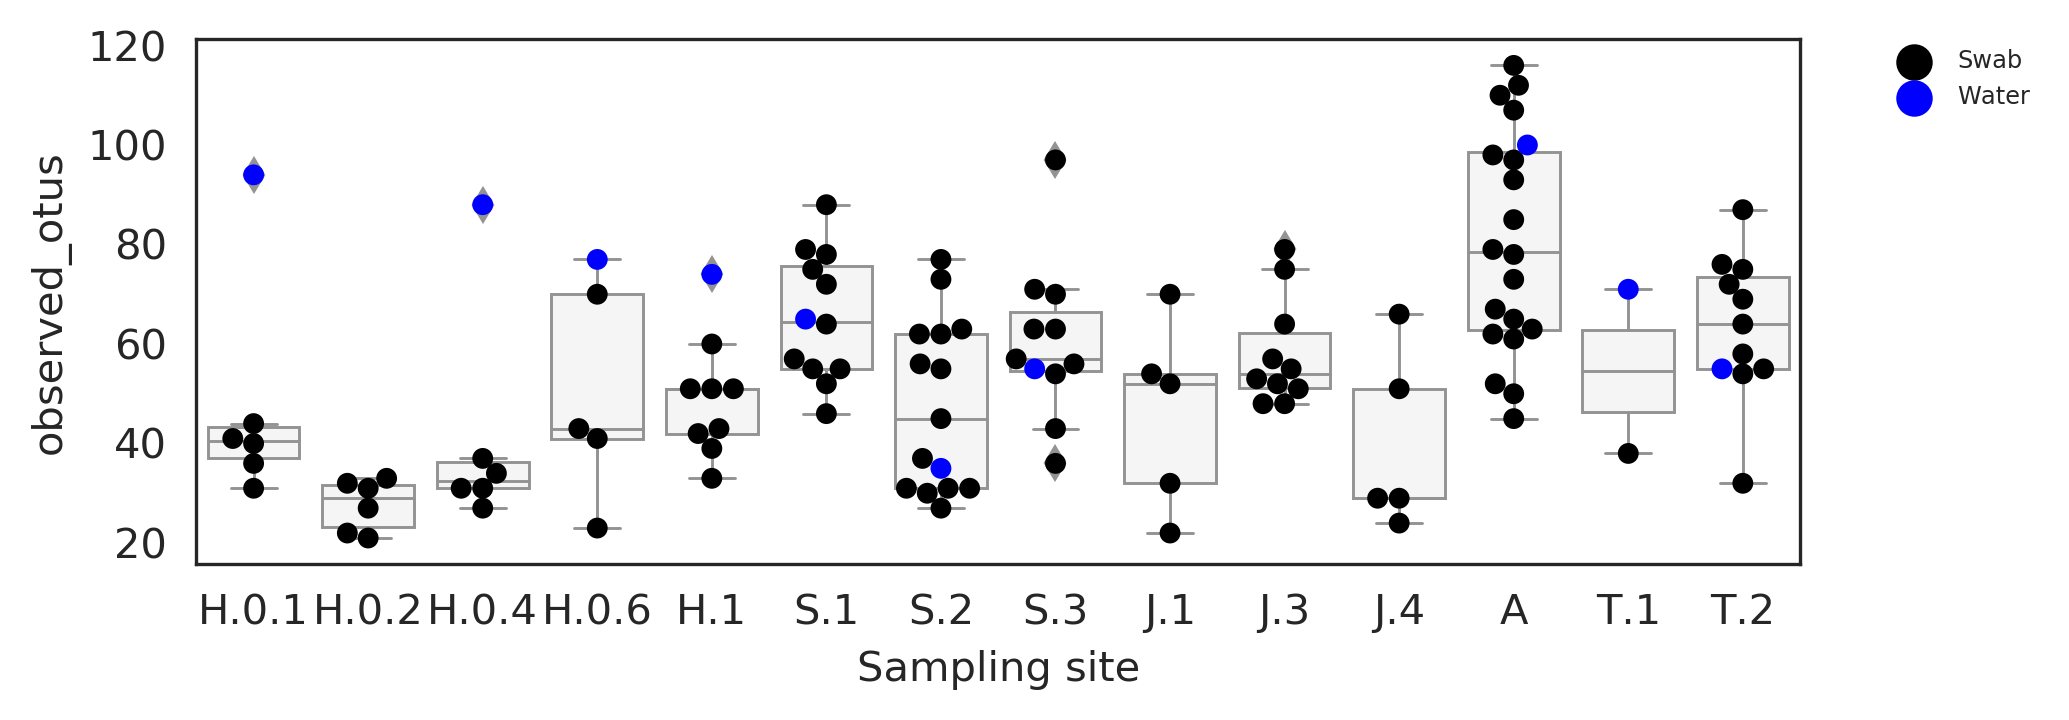

/home/amir/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


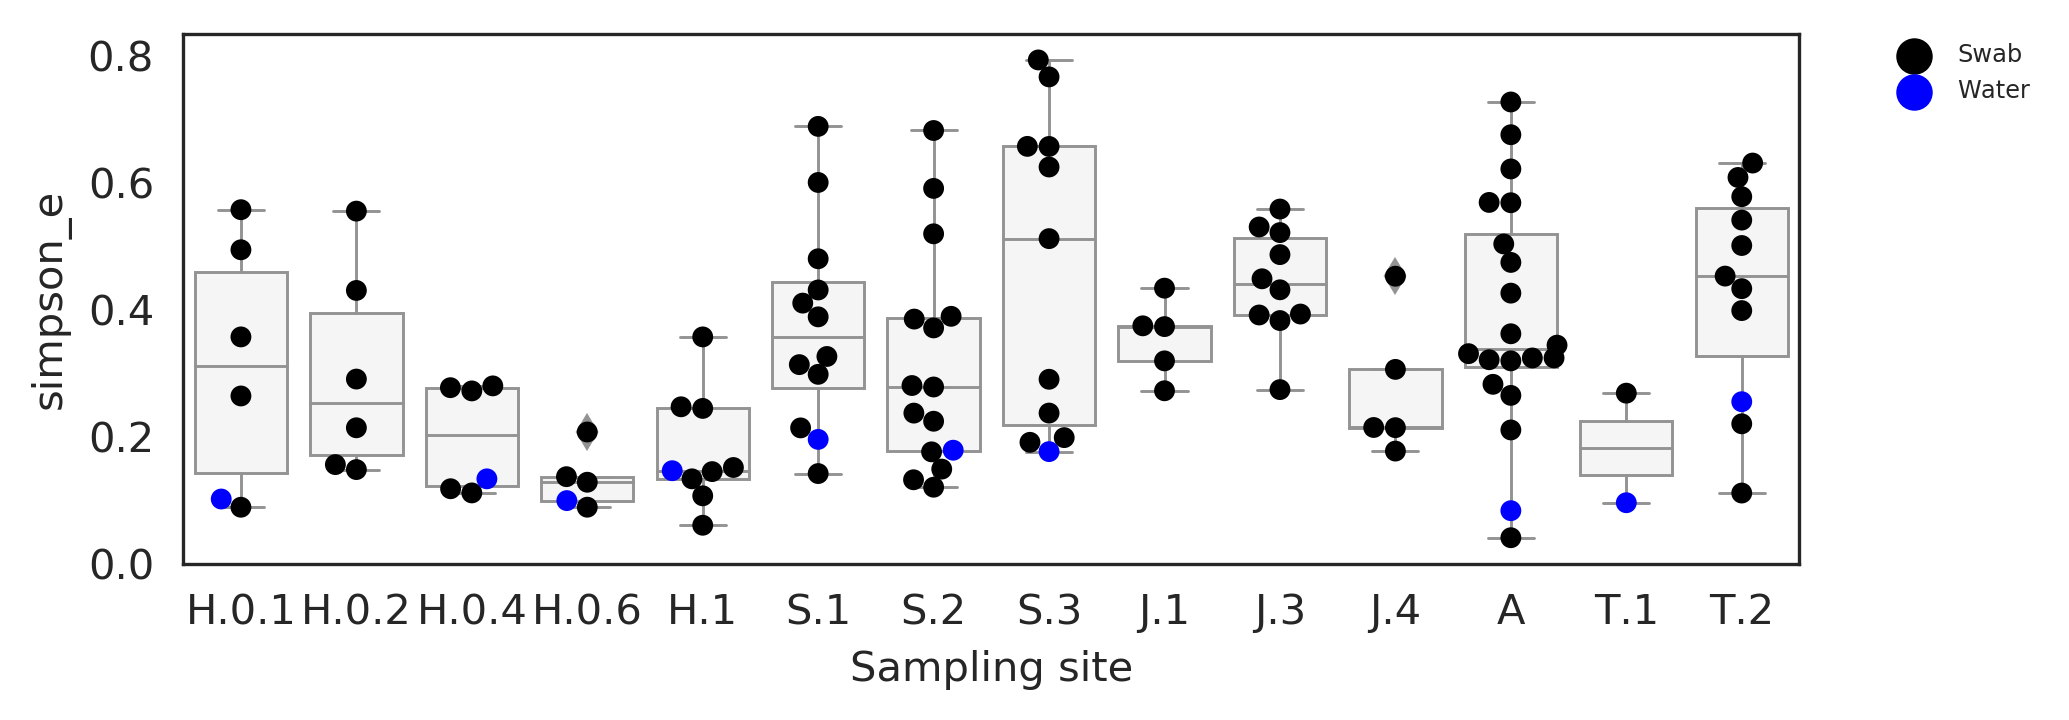

In [59]:
qza = 'dada_table.no_ntc.min2.qza'
a = !unzip $qza
digest = a[1].split('/')[0].replace('  inflating: ','')
inf = digest + '/data/feature-table.biom'
outf = 'temp.%s' % digest
a = !biom convert -i $inf -o $outf --to-tsv
biom = pd.read_table(outf,skiprows=1,index_col=0)
!rm -r $digest
!rm $outf

metadata = pd.read_table('fish_samples_metadata_loc_code_correct_sp.tsv',index_col=0)

files = list(glob.glob('alpha-diversity/*-vector.qza'))

for f in files:
    
    fig, ax = plt.subplots(dpi=300, figsize=(7,2.5), tight_layout=True)
    
    qza = f
    index = f.split('/')[-1].split('-')[0]
    a = !unzip $qza
    digest = a[1].split('/')[0].replace('  inflating: ','')
    inf = digest + '/data/alpha-diversity.tsv'
    faith_pd = pd.read_table(inf,index_col=0)
    !rm -r $digest

    metadata_with_faith_pd = pd.merge(metadata, faith_pd,left_index=True, right_index=True)

    order = ['H.0.1',
             'H.0.2',
             'H.0.4',
             'H.0.6',
             'H.1',
             'S.1',
             'S.2',
             'S.3',
             'J.1',
             'J.3',
             'J.4',
             'A',
             'T.1',
             'T.2']
    

    data = metadata_with_faith_pd.loc[metadata_with_faith_pd['Sampling site'].isin(order)].sort_values('Sampling site')

    hue_order = ['Swab','Water']
    
    sns.boxplot(
        x='Sampling site',
        y=index,
        data=data,
        order=order,
        ax=ax,
        color='whitesmoke',
        linewidth=0.7,
        saturation=0.5
    )

    sns.swarmplot(
        x='Sampling site',
        y=index,
        data=data,
        hue='type',
        hue_order=hue_order,
        order=order,
        ax=ax,
        palette = ['black','blue'])
#        #palette=sns.color_palette("BuGn_r",n_colors=7)+sns.light_palette("red",n_colors=6,reverse=True)+sns.xkcd_palette(['purple','brown','amber','black'])
#    )

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='xx-small',frameon=False)    
    plt.savefig('figures/%s_alpha.png' % index)

/home/amir/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
/home/amir/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:48: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
/home/amir/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


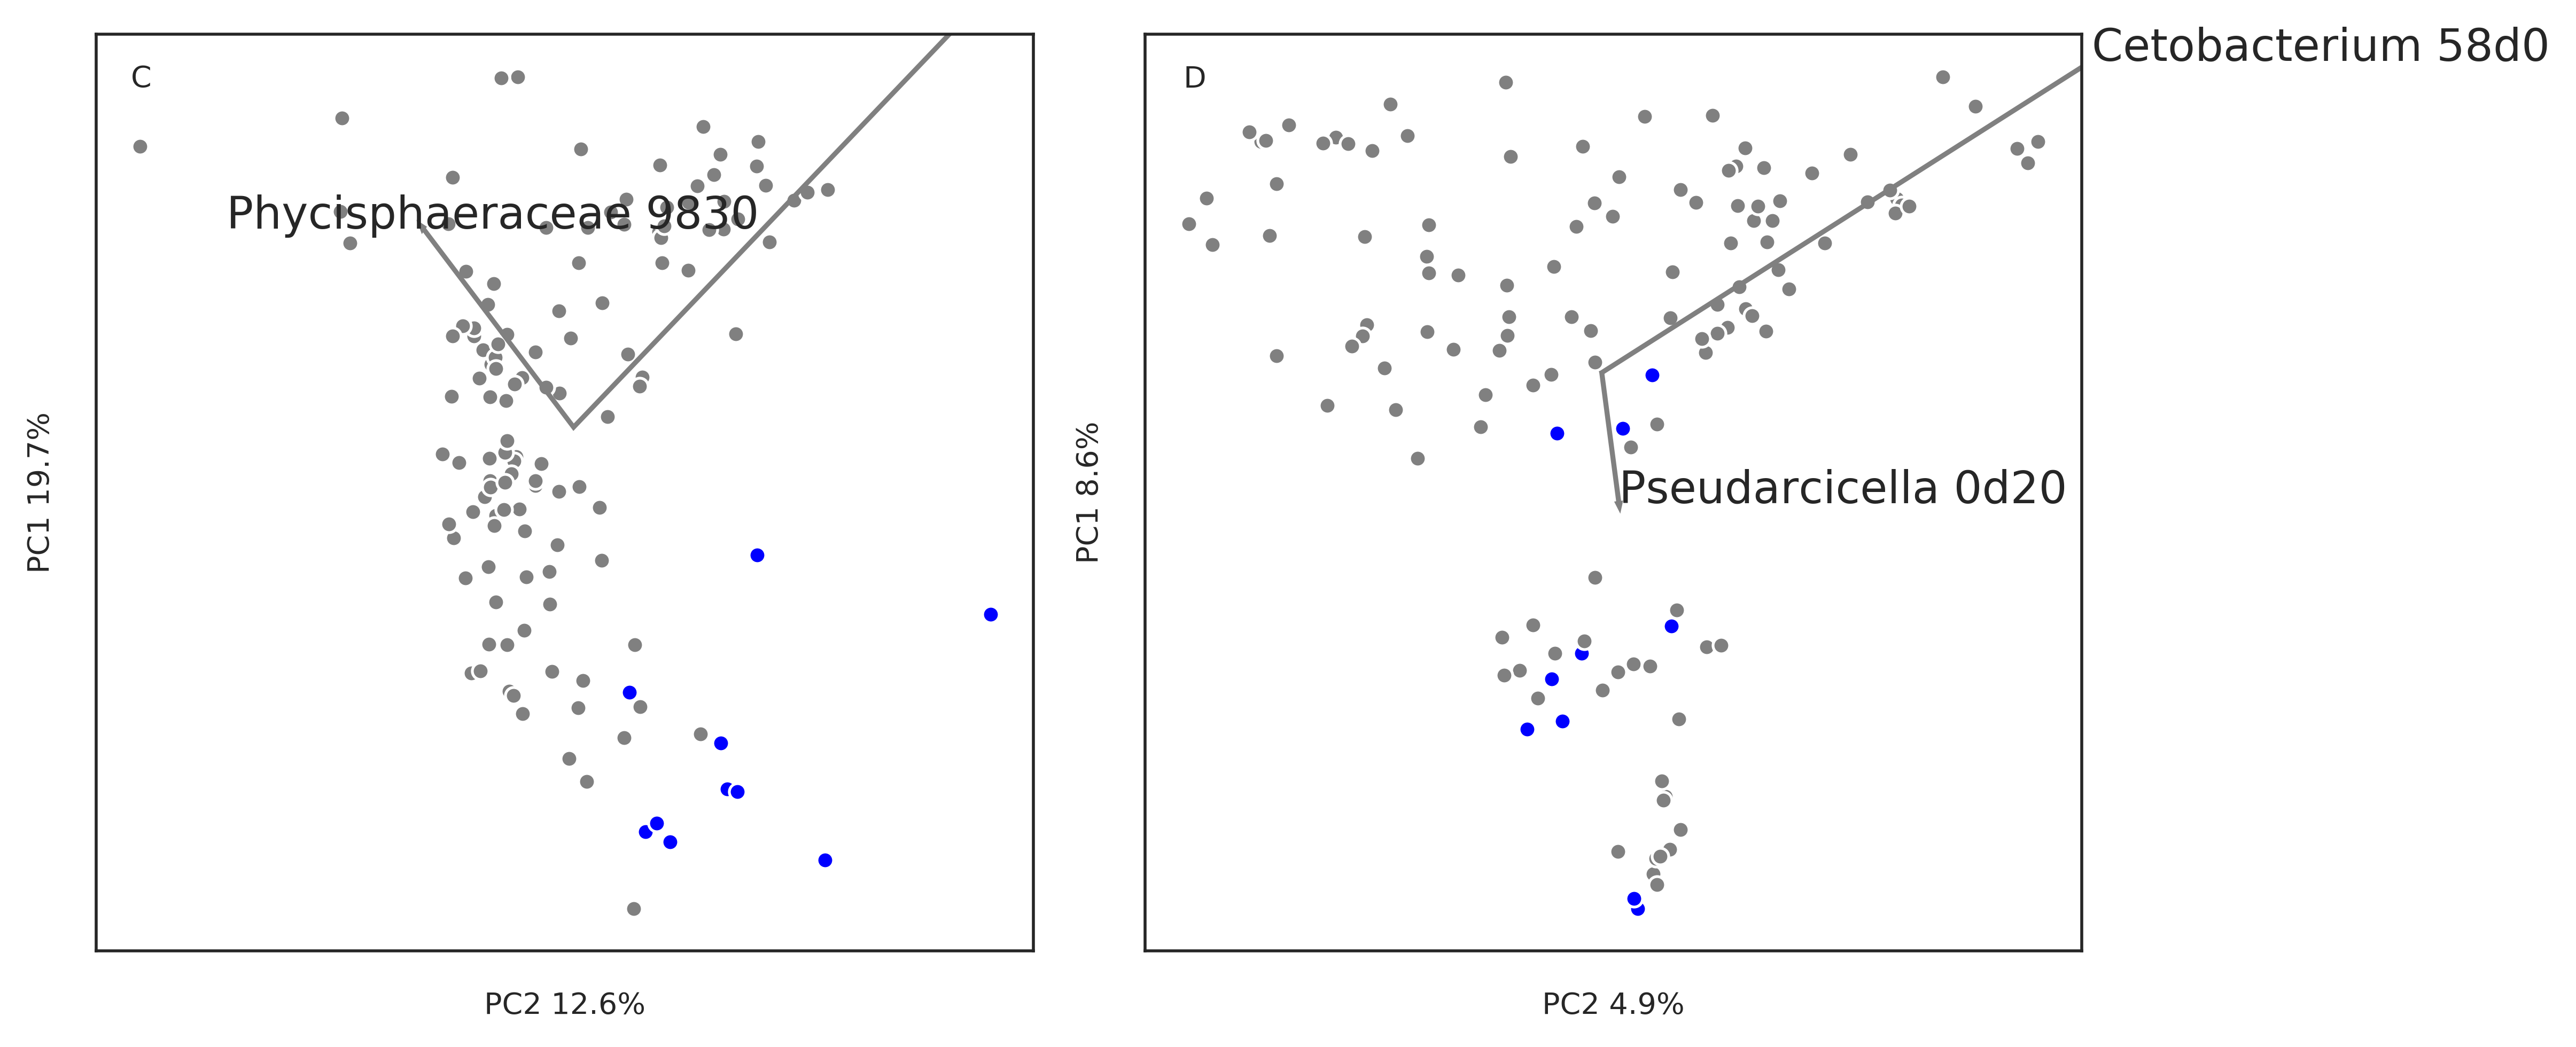

In [78]:
sns.set_style("white")

colors = {
    'Swab': 'gray',
    'Water': 'Blue'
    
}

markers = {
    'H': 'o',
    'J': 'o',
    'S': 'o',
    'T': 'o',
    'A': 'o'
}

sizes = {
    'H.0.1':20,
    'H.0.2':20,
    'H.0.4':20,
    'H.0.5':20,
    'H.0.6':20,
    'H.1':20,
    'J.1':20,
    'J.2':20,
    'J.3':20,
    'J.4':20,
    'S.1':20,
    'S.2':20,
    'S.3':20,
    'A': 20,
    'T.1': 20,
    'T.2': 20
}

def parse_biplot(qza):
    a = !unzip $qza
    digest = a[1].split('/')[0].replace('  inflating: ','')
    inf = digest + '/data/ordination.txt'
    lines = open(inf,'r').readlines()
    Eigvals = [float(i) for i in lines[1].rstrip().split('\t')]
    Proportion = [float(i) for i in lines[4].rstrip().split('\t')]
    biplot_skiprows = 7
    biplot_skipfoot = len(open(inf,'r').read().split('Site')[1].splitlines()) + 1
    pcoa_skiprows = len(open(inf,'r').read().split('Site')[0].splitlines()) + 1
    pcoa_skipfoot = 4
    pcoa = pd.read_table(inf, index_col=0, skiprows=pcoa_skiprows, skipfooter=pcoa_skipfoot, header=None)
    biplot = pd.read_table(inf, index_col=0, skiprows=biplot_skiprows, skipfooter=biplot_skipfoot, header=None)
    !rm -r $digest
    return  pcoa, biplot, Eigvals, Proportion

def get_arrow_coords_for_axis(axis,axis2,num,biplot,taxa):
    arrow_data = []
    for ind in biplot.reindex(biplot[axis].abs().sort_values(ascending=False).index).index.tolist()[:num]:
        tax_line = taxa.at[ind,'Taxon'].split(';')
        taxon = tax_line.pop(-1)
        while taxon == 'NA' and tax_line:
            taxon = tax_line.pop(-1)
        taxon += ' ' + ind[-4:]
        arrow_data.append([taxon,biplot.at[ind,axis],biplot.at[ind,axis2]])
    return arrow_data
        
qza = 'dada_taxa.qza'
a = !unzip $qza
digest = a[1].split('/')[0].replace('  inflating: ','')
inf = digest + '/data/taxonomy.tsv'
taxa = pd.read_table(inf,index_col=0)
!rm -r $digest     

fig, axes = plt.subplots(ncols=2,figsize=(8,4), tight_layout=True,dpi=500)


biplot_features = set()


ax = axes[0]

qza = 'core-metrics-results/weighted_unifrac_pcoa_results_biplot.qza'

ordination, biplot, Eigvals, Proportion = parse_biplot(qza)

pca_metadata = metadata.loc[metadata.index.isin(ordination.index)]

x=2
y=1
for sample_type in set(pca_metadata['type']):
    for loc in set(pca_metadata['Sampling site']):
        color = colors[sample_type]
        marker = markers[loc[0]]
        size = sizes[loc]
        data = ordination.loc[ordination.index.isin(pca_metadata.loc[((pca_metadata['type'] == sample_type) & 
                                                        (pca_metadata['Sampling site'] == loc))].index)]
        
        sns.scatterplot(x=x,y=y,data=data, ax=ax, legend=False, color=color,marker=marker,s=size) 
    
arrow_data_y_axis = get_arrow_coords_for_axis(y,x,2,biplot,taxa)  

for arrow in arrow_data_y_axis:
    ax.arrow(0, 0, arrow[2], arrow[1],fc='gray',ec='gray')
    text_x = arrow[2]
    if text_x < 0:
        text_x -= 0.2
    if text_x < 0.5:
        ax.text(text_x, arrow[1], arrow[0],fontdict={'fontsize': 12})
    biplot_features.add(arrow[0])
        
ax.set_xticklabels([])
ax.set_yticklabels([])
#ax.set_xlim(-0.3,0.45)
ax.set_ylabel('PC%i %.1f%%' % (y, Proportion[0]*100.0),fontdict={'fontsize': 8})
ax.set_xlabel('PC%i %.1f%%' % (x, Proportion[1]*100.0),fontdict={'fontsize': 8})
ax.text(-0.45, 0.25,'C',fontdict={'fontsize': 8})
        
ax = axes[1]

qza = 'core-metrics-results/jaccard_pcoa_results_biplot.qza'

ordination, biplot, Eigvals, Proportion = parse_biplot(qza)

pca_metadata = metadata.loc[metadata.index.isin(ordination.index)]
x=2
y=1

for sample_type in set(pca_metadata['type']):
    for loc in set(pca_metadata['Sampling site']):
        color = colors[sample_type]
        marker = markers[loc[0]]
        size = sizes[loc]
        data = ordination.loc[ordination.index.isin(pca_metadata.loc[((pca_metadata['type'] == sample_type) & 
                                                        (pca_metadata['Sampling site'] == loc))].index)]
        sns.scatterplot(x=x,y=y,data=data, ax=ax, legend=False, color=color,marker=marker,s=size) 
        
arrow_data_x_axis = get_arrow_coords_for_axis(x,y,1,biplot,taxa)  


arrow_data_y_axis = get_arrow_coords_for_axis(y,x,2,biplot,taxa)  

for arrow in arrow_data_y_axis:
    ax.arrow(0, 0, arrow[2], arrow[1],fc='gray',ec='gray')
    text_x = arrow[2]
    if text_x < 0:
        text_x -= 0.15
    ax.text(text_x, arrow[1], arrow[0],fontdict={'fontsize': 12})
    biplot_features.add(arrow[0])
    
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_ylabel('PC%i %.1f%%' % (y, Proportion[0]*100.0),fontdict={'fontsize': 8})
ax.set_xlabel('PC%i %.1f%%' % (x, Proportion[1]*100.0),fontdict={'fontsize': 8})
ax.text(-0.33, 0.24,'D',fontdict={'fontsize': 8})

plt.savefig('figures/PCoA_biplot_with_Water.png')

#### MDS, swabs only

/home/amir/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


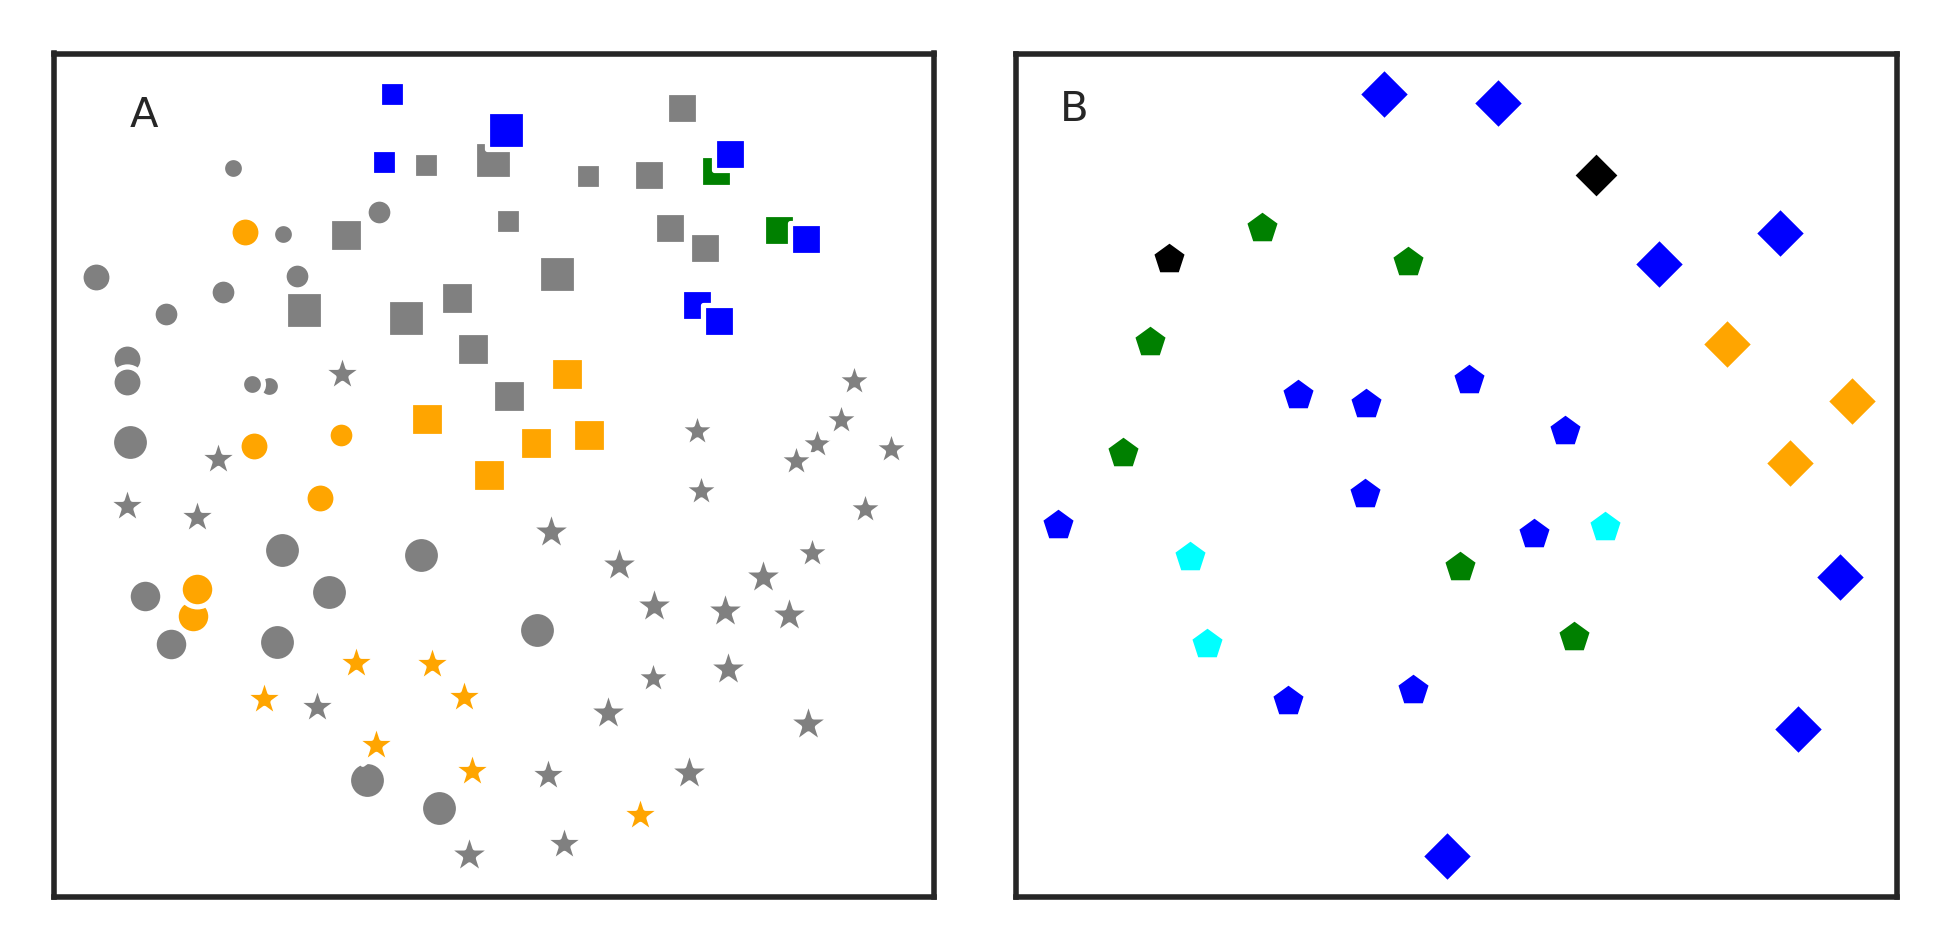

In [81]:
sns.set_style("white")

colors = {
    'Cyprinidae': 'gray',
    'Haplochrominae': 'green',
    'Nemacheilidae': 'orange',
    'Tilapiinae': 'blue',
    'Poeciliidae': 'Black',
    'Mugilidae': 'Cyan'
    
}

markers = {
    'H': 'o',
    'J': 's',
    'S': '*',
    'T': 'D',
    'A': 'p'
}

sizes = {
    'H.0.1':25,
    'H.0.2':20,
    'H.0.4':15,
    'H.0.5':10,
    'H.0.6':10,
    'H.1':30,
    'J.1':30,
    'J.2':25,
    'J.3':20,
    'J.4':15,
    'S.1':50,
    'S.2':45,
    'S.3':40,
    'A': 30,
    'T.1': 25,
    'T.2': 30
}


fig, axes = plt.subplots(ncols=2,figsize=(4,2), tight_layout=True,dpi=500)

ax = axes[0]

qza = 'core-metrics-results-North/unweighted_unifrac_distance_matrix.qza'
a = !unzip $qza
digest = a[1].split('/')[0].replace('  inflating: ','')
inf = digest + '/data/distance-matrix.tsv'
matrix = pd.read_table(inf,index_col=0)
!rm -r $digest

distance = qza.split('/')[-1].rpartition('-')[0]
metadata = pd.read_table('fish_samples_metadata_loc_code_correct_sp.tsv',index_col=0)
mds_metadata = metadata.loc[metadata.index.isin(matrix.columns)]
mds = manifold.MDS(max_iter=1000,n_init=1000,n_jobs=10,dissimilarity='precomputed',random_state=4783)
mds.fit(matrix)
pos = mds.embedding_
pos = pd.DataFrame(data=pos,columns=['x','y'],index=matrix.index)
for fam in set(mds_metadata.family_or_tribe):
    for loc in set(mds_metadata['Sampling site']):
        color = colors[fam]
        marker = markers[loc[0]]
        size = sizes[loc]
        data = pos.loc[pos.index.isin(mds_metadata.loc[((mds_metadata.family_or_tribe == fam) & 
                                                        (mds_metadata['Sampling site'] == loc))].index)]
        sns.scatterplot(x='x',y='y',data=data, ax=ax, legend=False, color=color,marker=marker,s=size) 
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.text(-0.5,0.5,'A',fontdict={'fontsize': 6})
        
ax = axes[1]

qza = 'core-metrics-results-South/unweighted_unifrac_distance_matrix.qza'
a = !unzip $qza
digest = a[1].split('/')[0].replace('  inflating: ','')
inf = digest + '/data/distance-matrix.tsv'
matrix = pd.read_table(inf,index_col=0)
!rm -r $digest

distance = qza.split('/')[-1].rpartition('-')[0]
mds_metadata = metadata.loc[metadata.index.isin(matrix.columns)]
mds = manifold.MDS(max_iter=1000,n_init=1000,n_jobs=10,dissimilarity='precomputed',random_state=4783)
mds.fit(matrix)
pos = mds.embedding_
pos = pd.DataFrame(data=pos,columns=['x','y'],index=matrix.index)
for fam in set(mds_metadata.family_or_tribe):
    for loc in set(mds_metadata['Sampling site']):
        color = colors[fam]
        marker = markers[loc[0]]
        size = sizes[loc]
        data = pos.loc[pos.index.isin(mds_metadata.loc[((mds_metadata.family_or_tribe == fam) & 
                                                        (mds_metadata['Sampling site'] == loc))].index)]
        sns.scatterplot(x='x',y='y',data=data, ax=ax, legend=False, color=color,marker=marker,s=size)        
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.text(-0.5,0.5,'B',fontdict={'fontsize': 6})
plt.savefig('figures/MDS.png')

/home/amir/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  if sys.path[0] == '':
/home/amir/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  del sys.path[0]
/home/amir/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


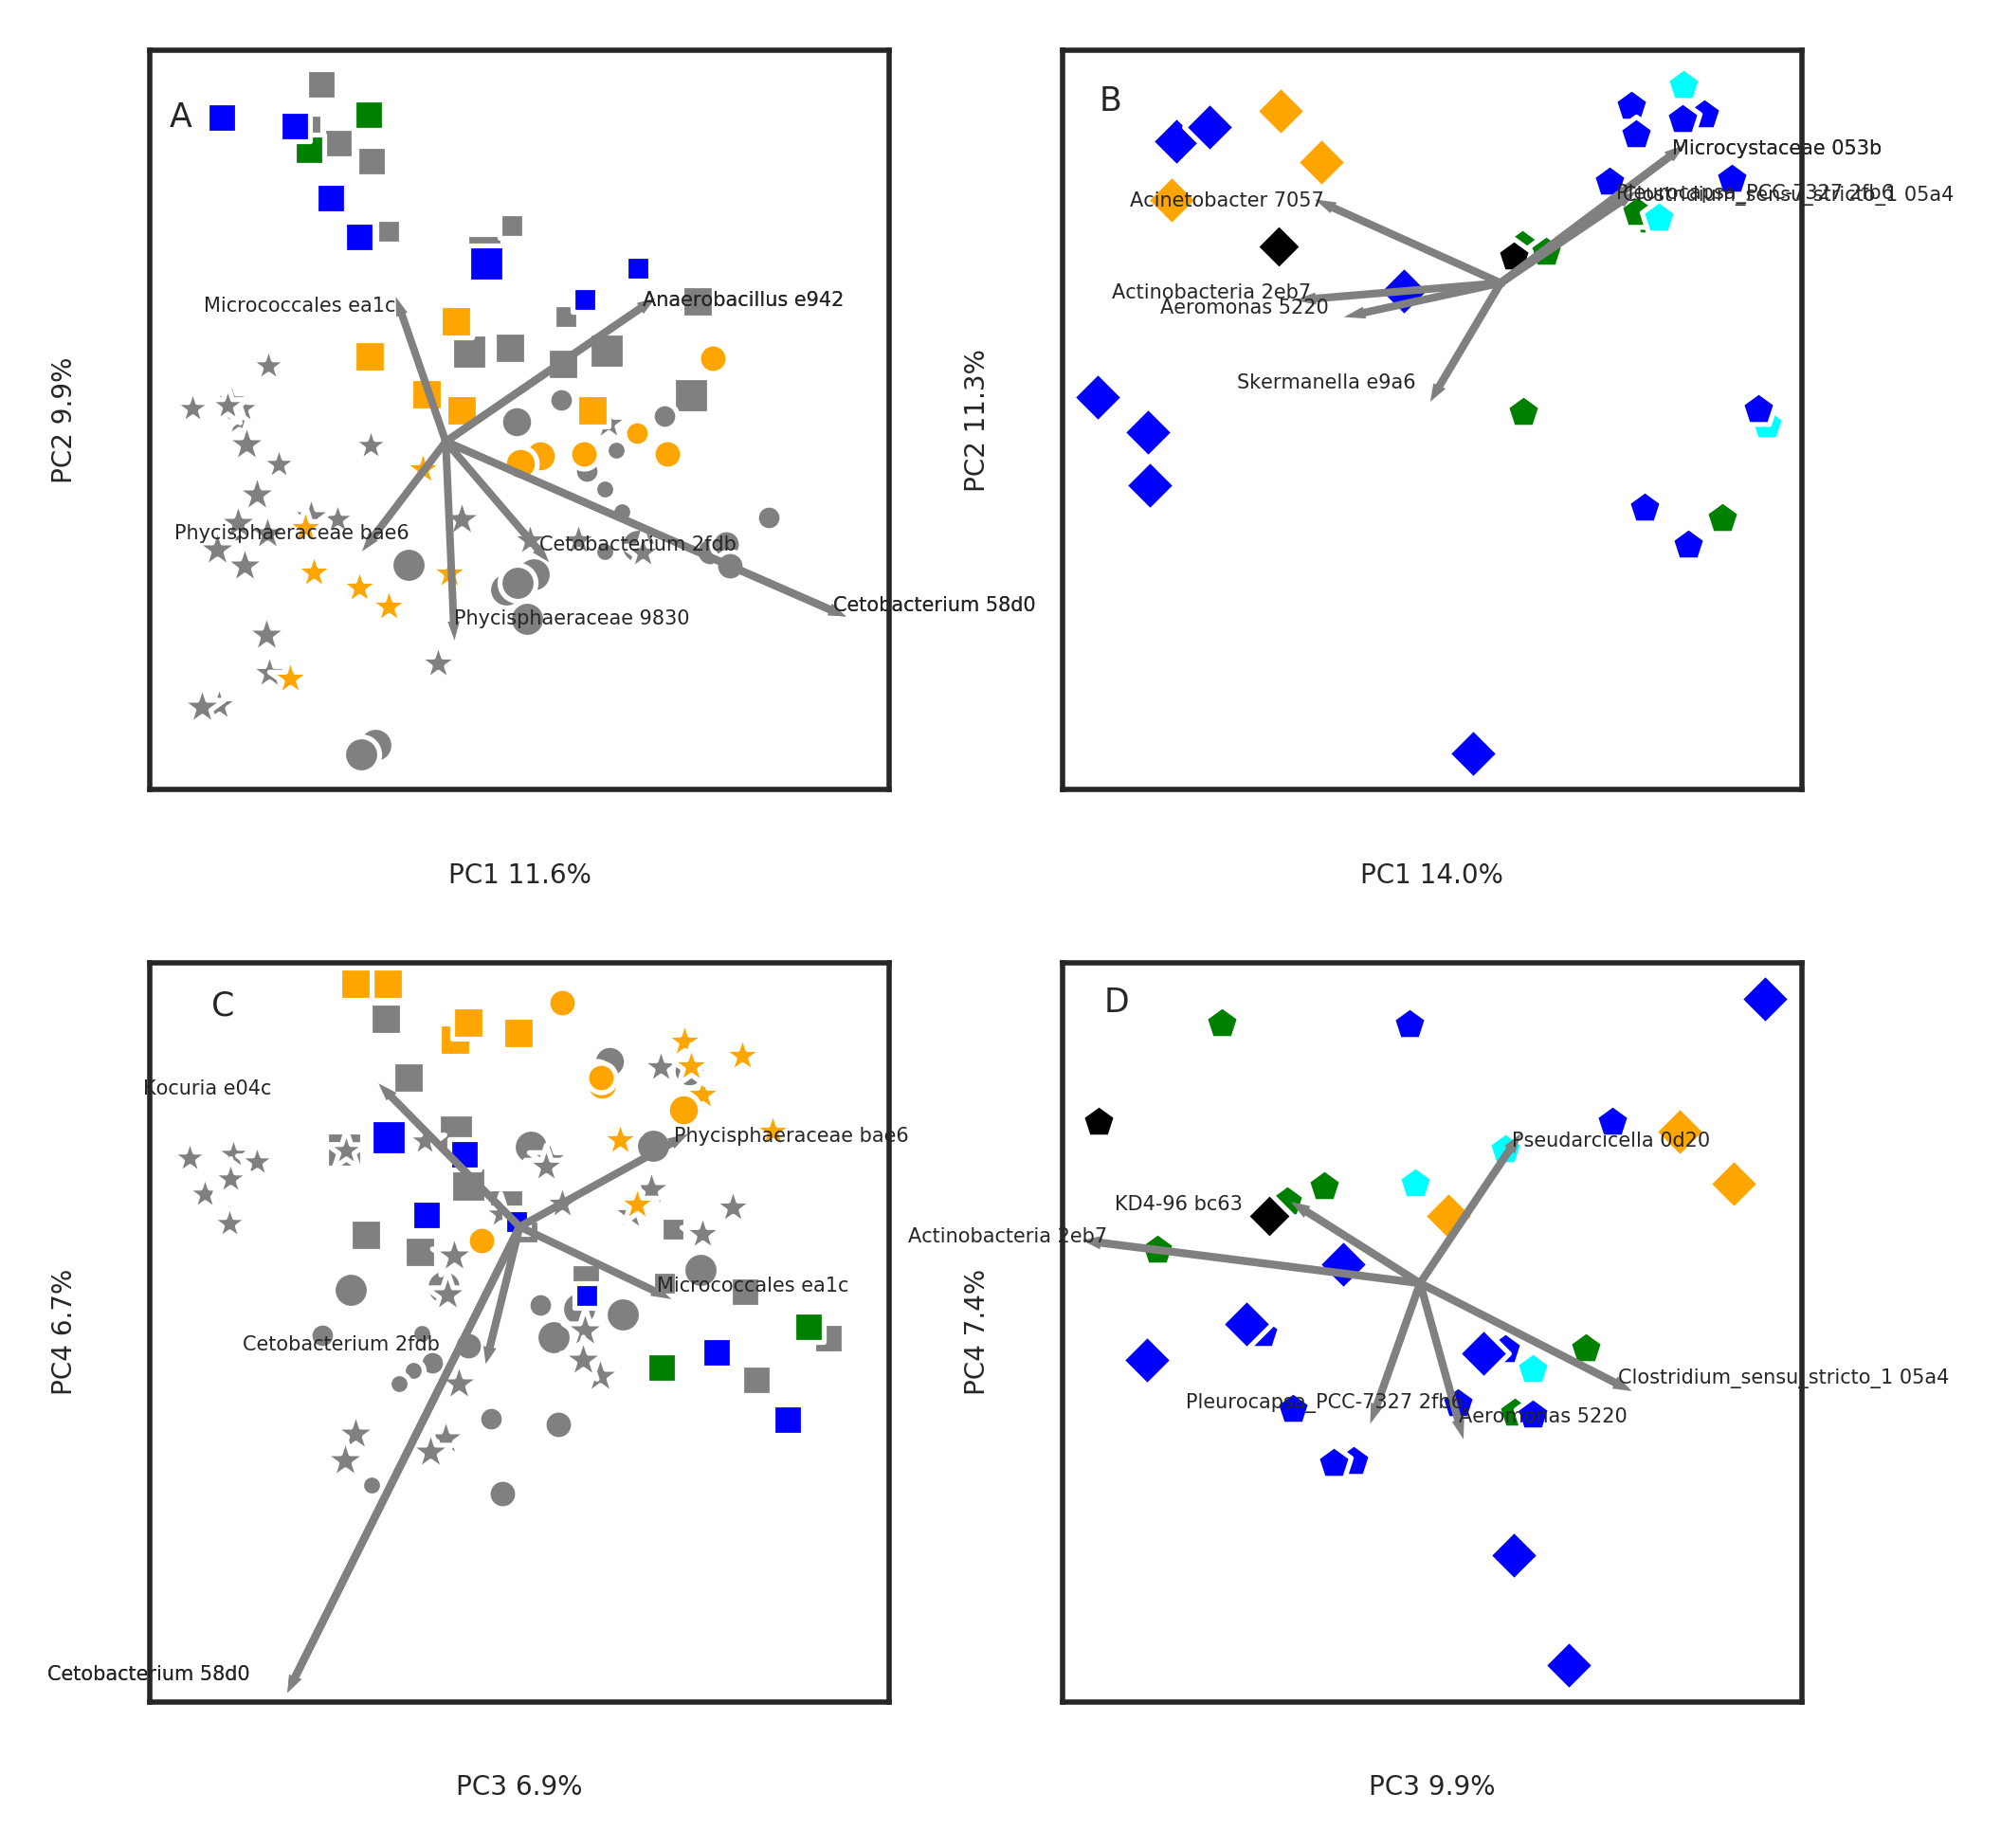

In [82]:
def parse_biplot(qza):
    a = !unzip $qza
    digest = a[1].split('/')[0].replace('  inflating: ','')
    inf = digest + '/data/ordination.txt'
    lines = open(inf,'r').readlines()
    Eigvals = [float(i) for i in lines[1].rstrip().split('\t')]
    Proportion = [float(i) for i in lines[4].rstrip().split('\t')]
    biplot_skiprows = 7
    biplot_skipfoot = len(open(inf,'r').read().split('Site')[1].splitlines()) + 1
    pcoa_skiprows = len(open(inf,'r').read().split('Site')[0].splitlines()) + 1
    pcoa_skipfoot = 4
    pcoa = pd.read_table(inf, index_col=0, skiprows=pcoa_skiprows, skipfooter=pcoa_skipfoot, header=None)
    biplot = pd.read_table(inf, index_col=0, skiprows=biplot_skiprows, skipfooter=biplot_skipfoot, header=None)
    !rm -r $digest
    return  pcoa, biplot, Eigvals, Proportion

def get_arrow_coords_for_axis(axis,axis2,num,biplot,taxa):
    arrow_data = []
    for ind in biplot.reindex(biplot[axis].abs().sort_values(ascending=False).index).index.tolist()[:num]:
        tax_line = taxa.at[ind,'Taxon'].split(';')
        taxon = tax_line.pop(-1)
        while taxon == 'NA' and tax_line:
            taxon = tax_line.pop(-1)
        taxon += ' ' + ind[-4:]
        arrow_data.append([taxon,biplot.at[ind,axis],biplot.at[ind,axis2]])
    return arrow_data
        
qza = 'dada_taxa.qza'
a = !unzip $qza
digest = a[1].split('/')[0].replace('  inflating: ','')
inf = digest + '/data/taxonomy.tsv'
taxa = pd.read_table(inf,index_col=0)
!rm -r $digest     

fig, axes = plt.subplots(ncols=2,nrows=2,figsize=(4,4), tight_layout=True,dpi=500)


biplot_features = set()


ax = axes[0][0]

qza = 'core-metrics-results-North/unweighted_unifrac_pcoa_results_biplot.qza'

ordination, biplot, Eigvals, Proportion = parse_biplot(qza)

pca_metadata = metadata.loc[metadata.index.isin(ordination.index)]

x=1
y=2
for fam in set(pca_metadata.family_or_tribe):
    for loc in set(pca_metadata['Sampling site']):
        color = colors[fam]
        marker = markers[loc[0]]
        size = sizes[loc]
        data = ordination.loc[ordination.index.isin(pca_metadata.loc[((pca_metadata.family_or_tribe == fam) & 
                                                        (pca_metadata['Sampling site'] == loc))].index)]
        
        sns.scatterplot(x=x,y=y,data=data, ax=ax, legend=False, color=color,marker=marker,s=size) 
        
arrow_data_x_axis = get_arrow_coords_for_axis(1,2,4,biplot,taxa)  

for arrow in arrow_data_x_axis:
    ax.arrow(0, 0, arrow[1], arrow[2],fc='gray',ec='gray')
    text_x = arrow[1]
    if text_x < 0:
        text_x -= 0.2
    ax.text(text_x, arrow[2], arrow[0],fontdict={'fontsize': 3})
    biplot_features.add(arrow[0])
    
arrow_data_y_axis = get_arrow_coords_for_axis(2,1,4,biplot,taxa)  

for arrow in arrow_data_y_axis:
    ax.arrow(0, 0, arrow[2], arrow[1],fc='gray',ec='gray')
    text_x = arrow[2]
    if text_x < 0:
        text_x -= 0.2
    ax.text(text_x, arrow[1], arrow[0],fontdict={'fontsize': 3})
    biplot_features.add(arrow[0])
        
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlim(-0.3,0.45)
ax.set_ylabel('PC%i %.1f%%' % (y, Proportion[1]*100.0),fontdict={'fontsize': 4})
ax.set_xlabel('PC%i %.1f%%' % (x, Proportion[0]*100.0),fontdict={'fontsize': 4})
ax.text(-0.28, 0.3,'A',fontdict={'fontsize': 5})
        
ax = axes[0][1]

qza = 'core-metrics-results-South/unweighted_unifrac_pcoa_results_biplot.qza'

ordination, biplot, Eigvals, Proportion = parse_biplot(qza)

pca_metadata = metadata.loc[metadata.index.isin(ordination.index)]
x=1
y=2

for fam in set(pca_metadata.family_or_tribe):
    for loc in set(pca_metadata['Sampling site']):
        color = colors[fam]
        marker = markers[loc[0]]
        size = sizes[loc]
        data = ordination.loc[ordination.index.isin(pca_metadata.loc[((pca_metadata.family_or_tribe == fam) & 
                                                        (pca_metadata['Sampling site'] == loc))].index)]
        sns.scatterplot(x=1,y=2,data=data, ax=ax, legend=False, color=color,marker=marker,s=size) 
        
arrow_data_x_axis = get_arrow_coords_for_axis(1,2,4,biplot,taxa)  

for arrow in arrow_data_x_axis:
    ax.arrow(0, 0, arrow[1], arrow[2],fc='gray',ec='gray')
    text_x = arrow[1]
    if text_x < 0:
        text_x -= 0.15
    ax.text(text_x, arrow[2], arrow[0],fontdict={'fontsize': 3})
    biplot_features.add(arrow[0])
    
arrow_data_y_axis = get_arrow_coords_for_axis(2,1,4,biplot,taxa)  

for arrow in arrow_data_y_axis:
    ax.arrow(0, 0, arrow[2], arrow[1],fc='gray',ec='gray')
    text_x = arrow[2]
    if text_x < 0:
        text_x -= 0.15
    ax.text(text_x, arrow[1], arrow[0],fontdict={'fontsize': 3})
    biplot_features.add(arrow[0])
    
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_ylabel('PC%i %.1f%%' % (y, Proportion[1]*100.0),fontdict={'fontsize': 4})
ax.set_xlabel('PC%i %.1f%%' % (x, Proportion[0]*100.0),fontdict={'fontsize': 4})
ax.text(-0.3, 0.15,'B',fontdict={'fontsize': 5})


ax = axes[1][0]
    
qza = 'core-metrics-results-North/unweighted_unifrac_pcoa_results_biplot.qza'

ordination, biplot, Eigvals, Proportion = parse_biplot(qza)

pca_metadata = metadata.loc[metadata.index.isin(ordination.index)]

x=3
y=4
for fam in set(pca_metadata.family_or_tribe):
    for loc in set(pca_metadata['Sampling site']):
        color = colors[fam]
        marker = markers[loc[0]]
        size = sizes[loc]
        data = ordination.loc[ordination.index.isin(pca_metadata.loc[((pca_metadata.family_or_tribe == fam) & 
                                                        (pca_metadata['Sampling site'] == loc))].index)]
        
        sns.scatterplot(x=x,y=y,data=data, ax=ax, legend=False, color=color,marker=marker,s=size) 
        
arrow_data_x_axis = get_arrow_coords_for_axis(3,4,3,biplot,taxa)  

for arrow in arrow_data_x_axis:
    ax.arrow(0, 0, arrow[1], arrow[2],fc='gray',ec='gray')
    text_x = arrow[1]
    if text_x < 0:
        text_x -= 0.2
    ax.text(text_x, arrow[2], arrow[0],fontdict={'fontsize': '3'})
    biplot_features.add(arrow[0])
    
arrow_data_y_axis = get_arrow_coords_for_axis(4,3,3,biplot,taxa)  

for arrow in arrow_data_y_axis:
    ax.arrow(0, 0, arrow[2], arrow[1],fc='gray',ec='gray')
    text_x = arrow[2]
    if text_x < 0:
        text_x -= 0.2
    ax.text(text_x, arrow[1], arrow[0],fontdict={'fontsize': '3'})
    biplot_features.add(arrow[0])
        
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlim(-0.30,0.3)
ax.set_ylim(-0.45,0.25)
ax.set_ylabel('PC%i %.1f%%' % (y, Proportion[3]*100.0),fontdict={'fontsize': '4'})
ax.set_xlabel('PC%i %.1f%%' % (x, Proportion[2]*100.0),fontdict={'fontsize': '4'})
ax.text(-0.25, 0.2,'C',fontdict={'fontsize': 5})

ax = axes[1][1]
    
qza = 'core-metrics-results-South/unweighted_unifrac_pcoa_results_biplot.qza'

ordination, biplot, Eigvals, Proportion = parse_biplot(qza)

pca_metadata = metadata.loc[metadata.index.isin(ordination.index)]

x=3
y=4

for fam in set(pca_metadata.family_or_tribe):
    for loc in set(pca_metadata['Sampling site']):
        color = colors[fam]
        marker = markers[loc[0]]
        size = sizes[loc]
        data = ordination.loc[ordination.index.isin(pca_metadata.loc[((pca_metadata.family_or_tribe == fam) & 
                                                        (pca_metadata['Sampling site'] == loc))].index)]
        sns.scatterplot(x=x,y=y,data=data, ax=ax, legend=False, color=color,marker=marker,s=size) 
        
arrow_data_x_axis = get_arrow_coords_for_axis(x,y,3,biplot,taxa)  

for arrow in arrow_data_x_axis:
    ax.arrow(0, 0, arrow[1], arrow[2],fc='gray',ec='gray')
    text_x = arrow[1]
    if text_x < 0:
        text_x -= 0.15
    ax.text(text_x, arrow[2], arrow[0],fontdict={'fontsize': '3'})
    biplot_features.add(arrow[0])
    
arrow_data_y_axis = get_arrow_coords_for_axis(y,x,3,biplot,taxa)  

for arrow in arrow_data_y_axis:
    ax.arrow(0, 0, arrow[2], arrow[1],fc='gray',ec='gray')
    text_x = arrow[2]
    if text_x < 0:
        text_x -= 0.15
    ax.text(text_x, arrow[1], arrow[0],fontdict={'fontsize': '3'})
    biplot_features.add(arrow[0])
    
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_ylabel('PC%i %.1f%%' % (y, Proportion[3]*100.0),fontdict={'fontsize': '4'})
ax.set_xlabel('PC%i %.1f%%' % (x, Proportion[2]*100.0),fontdict={'fontsize': '4'})
ax.text(-0.25, 0.2,'D',fontdict={'fontsize': 5})


plt.savefig('figures/PCoA_biplot.png')

In [89]:
%%bash

source activate qiime2-2019.4

qiime feature-table relative-frequency \
 --i-table dada_table.no_ntc.min2.qza \
 --o-relative-frequency-table temp.qza

Saved FeatureTable[RelativeFrequency] to: temp.qza


/home/amir/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


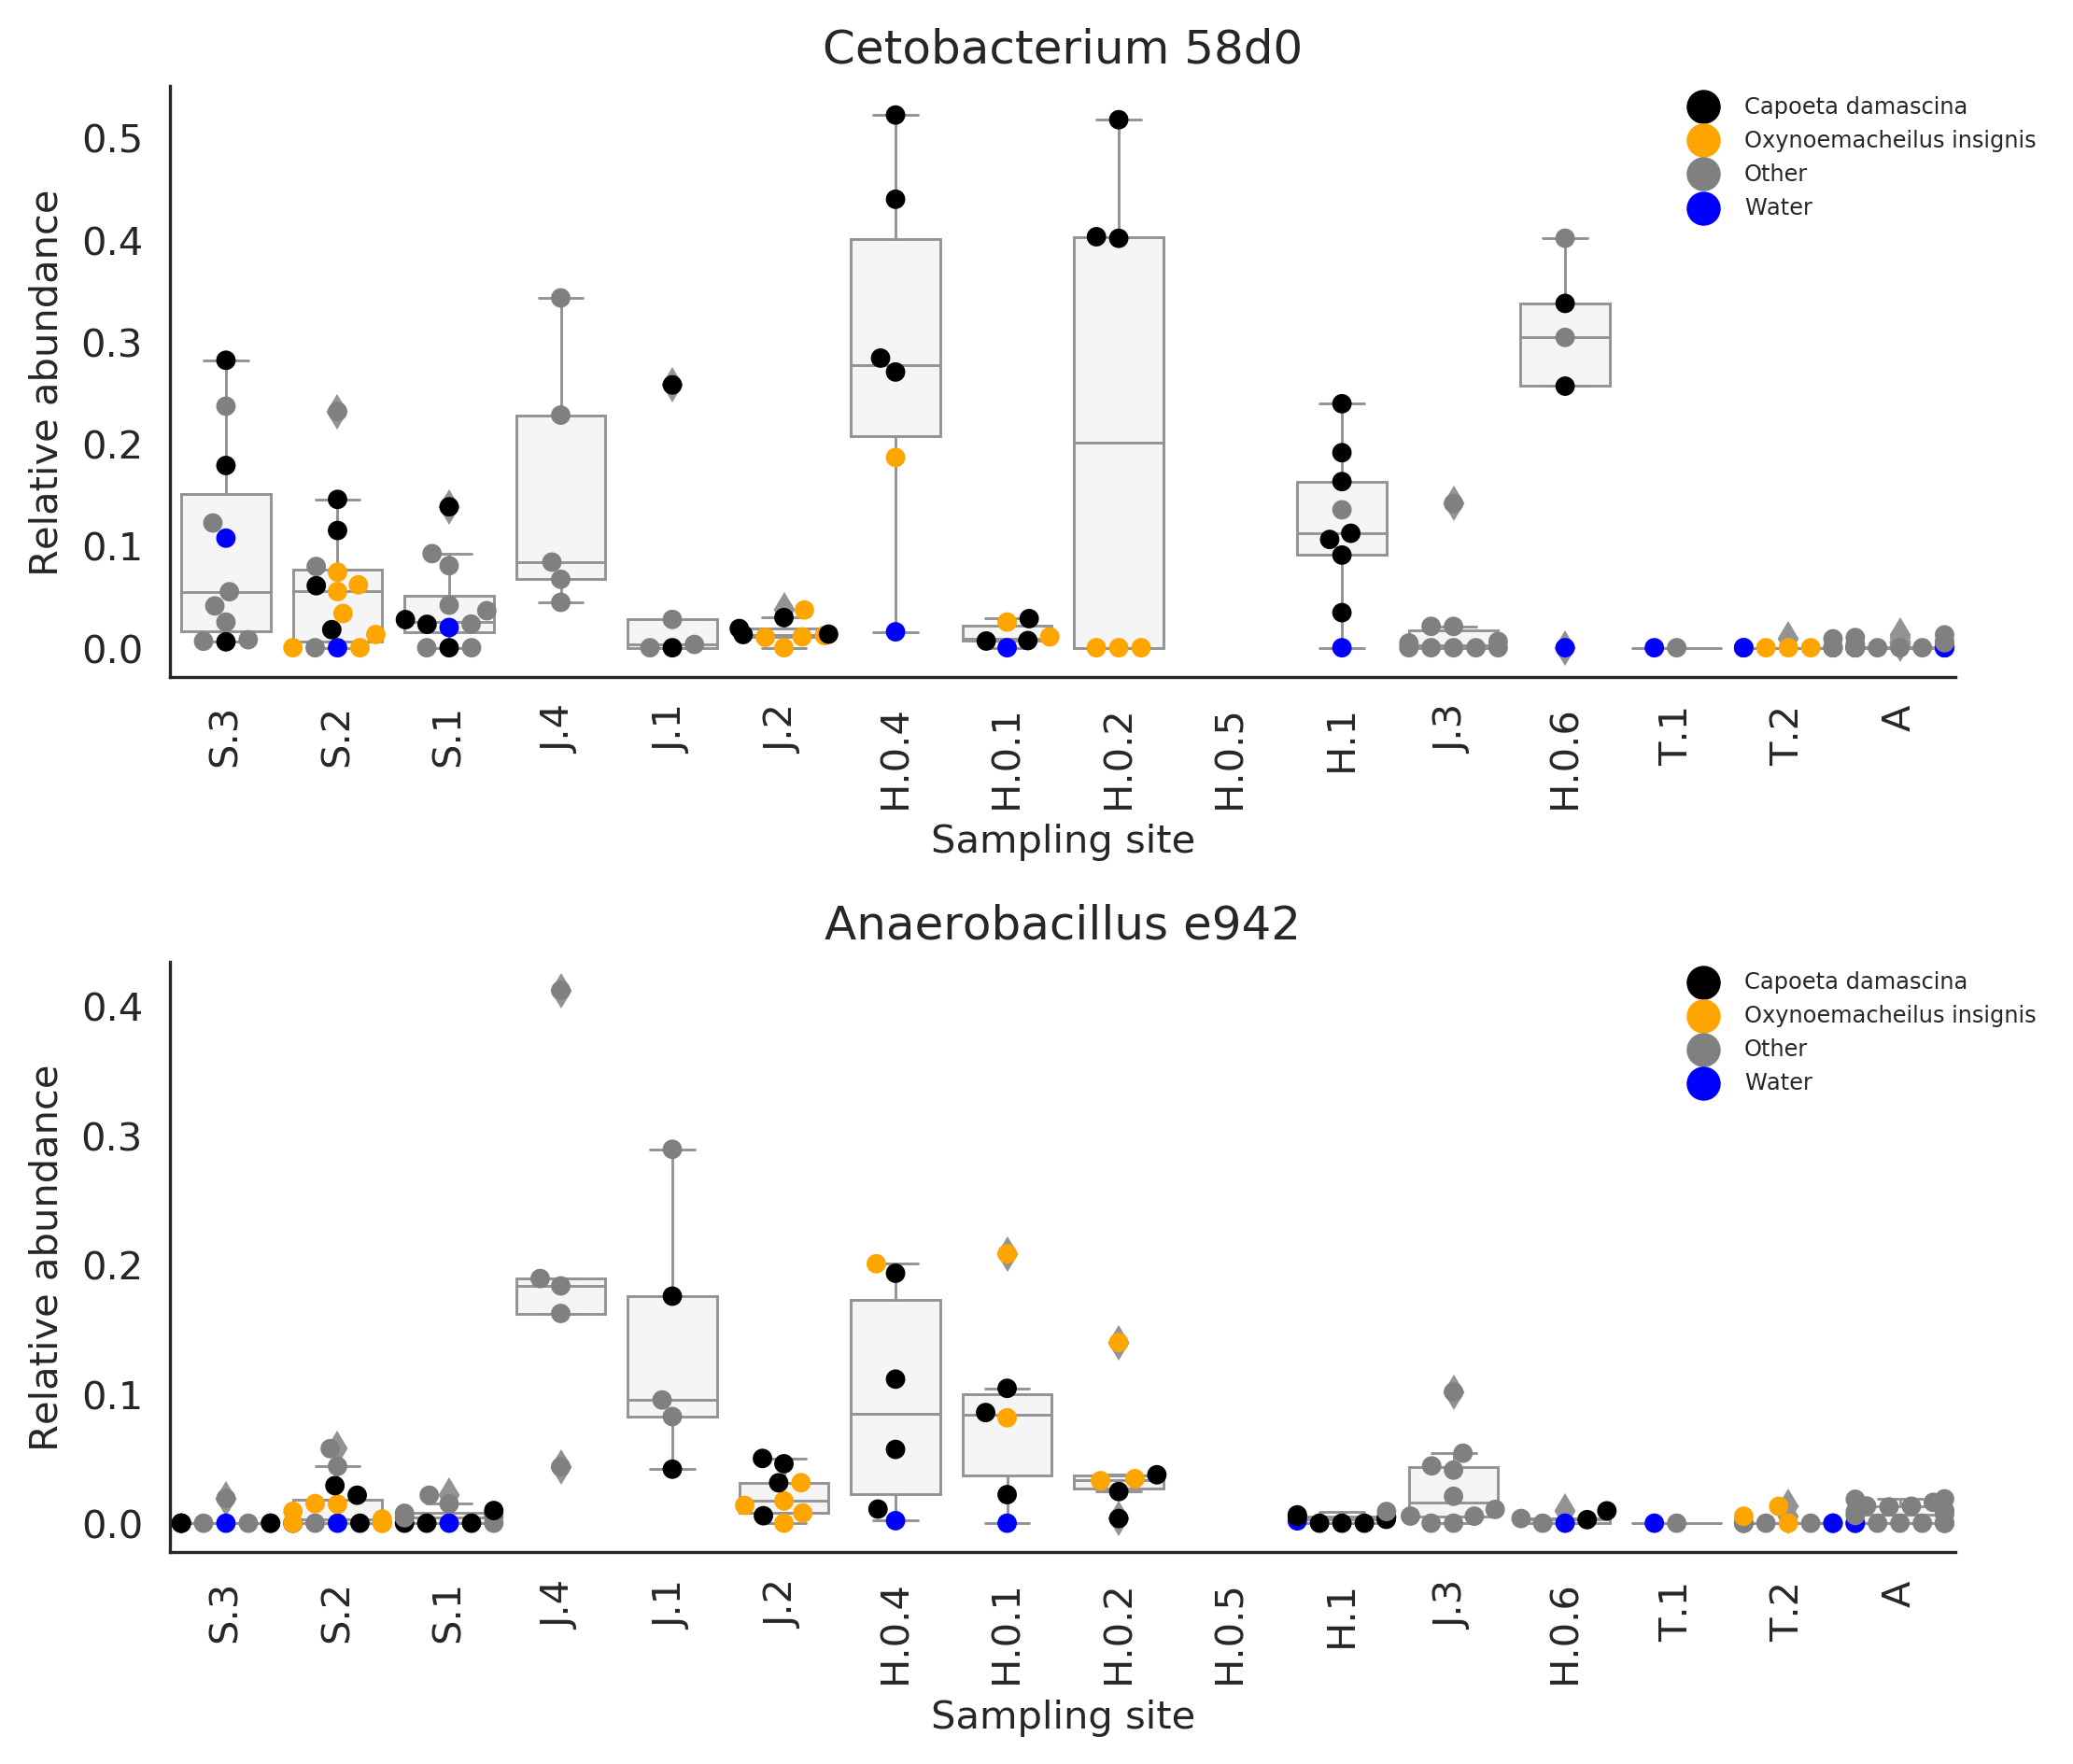

In [90]:
qza = 'temp.qza'
a = !unzip $qza
digest = a[1].split('/')[0].replace('  inflating: ','')
inf = digest + '/data/feature-table.biom'
outf = 'temp.%s' % digest
a = !biom convert -i $inf -o $outf --to-tsv
biom = pd.read_table(outf,skiprows=1,index_col=0)
!rm -r $digest
!rm $outf
!rm temp.qza

location_segregating_features = ['Cetobacterium 58d0', 'Anaerobacillus e942']#,'Phycisphaeraceae 9830']

fig, axes = plt.subplots(nrows = len(location_segregating_features), dpi=300,tight_layout=True, figsize=(7.5,3.2*len(location_segregating_features)))

ax_ind = 0

for bact_sp in location_segregating_features:
    ax = axes[ax_ind]
    ax_ind += 1
    ax.set_title(bact_sp)
    feature = [i for i in biom.index if i.endswith(bact_sp.split(' ')[1])][0]
    bact_sp_df = biom.loc[[feature],:]
    
    if len(bact_sp_df) == 0:
        continue


    narrow = pd.DataFrame(columns=['#SampleID','Sampling site','SP','Basin','Relative abundance'])

    for smpl in bact_sp_df.columns:
        narrow.loc[len(narrow)] = [smpl, metadata.at[smpl,'Sampling site'], metadata.at[smpl,'SP'], metadata.at[smpl,'Basin'], bact_sp_df.at[feature,smpl]]


    #bact_sp_df.loc['Total'] = bact_sp_df.sum()
    #narrow_sum = pd.DataFrame(columns=['#SampleID','Sampling site','SP','Basin','Relative abundance'])

    #for smpl in bact_sp_df.columns:
    #    narrow_sum.loc[len(narrow_sum)] = [smpl, metadata.at[smpl,'Sampling site'], metadata.at[smpl,'SP'], metadata.at[smpl,'Basin'], bact_sp_df.at['Total',smpl]]

    def set_sp_group(string):
        if string == 'Water':
            return 'Water'
        if string == 'Capoeta damascina':
            return 'Capoeta damascina'
        if string == 'Oxynoemacheilus insignis':
            return 'Oxynoemacheilus insignis'
        return 'Other'
    narrow['group'] = narrow.SP.apply(set_sp_group)

    order = ['S.3',
             'S.2',
             'S.1',
             'J.4',
             'J.1',
             'J.2',
             'H.0.4',
             'H.0.1',
             'H.0.2',
             'H.0.5',
             'H.1',
             'J.3',
             'H.0.6',
             'T.1',
             'T.2',
             'A']

    hue_order = [
     'Capoeta damascina',
     'Oxynoemacheilus insignis',
     'Other',
     'Water'
    ]


    sns.boxplot(
        x='Sampling site',
        y='Relative abundance',
        data=narrow,
        order=order,
        ax=ax,
        color='whitesmoke',
        linewidth=0.7
    )

    sns.swarmplot(
        x='Sampling site',
        y='Relative abundance',
        data=narrow,
        hue='group',
        order=order,
        hue_order=hue_order,
        ax=ax,
        palette = ['black','orange','gray','blue']
        )
    sns.despine()
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), rotation=90)

    ax.legend(bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0.,fontsize='xx-small',frameon=False)    
plt.savefig('figures/rel_abund_of_local_taxa.png')

In [91]:
biplot_features

{'Acinetobacter 7057',
 'Actinobacteria 2eb7',
 'Aeromonas 5220',
 'Anaerobacillus e942',
 'Cetobacterium 2fdb',
 'Cetobacterium 58d0',
 'Clostridium_sensu_stricto_1 05a4',
 'KD4-96 bc63',
 'Kocuria e04c',
 'Micrococcales ea1c',
 'Microcystaceae 053b',
 'Phycisphaeraceae 9830',
 'Phycisphaeraceae bae6',
 'Pleurocapsa_PCC-7327 2fb6',
 'Pseudarcicella 0d20',
 'Skermanella e9a6'}